In [8]:
import pandas as pd

# Load dataset
path = '../data/processed/FD001'

df = pd.read_csv(path)

In [9]:
X = df.drop(['Unit', 'Cycle', 'RUL', 'RUL_class'], axis=1).values
y = df['RUL_class'].values

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (19731, 56)
Shape of y: (19731,)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

X_scaled = scaler.transform(X)

print(f"Shape of X scaled: {X.shape}")

Shape of X: (19731, 56)


In [11]:
from sklearn.decomposition import PCA

# Defining the number of components
n_components = X_scaled.shape[1]

# Finding principal components for the dataset
pca = PCA(n_components=n_components, random_state=42)

# Fitting the model
X_pca = pca.fit_transform(X_scaled)

# The percentage of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

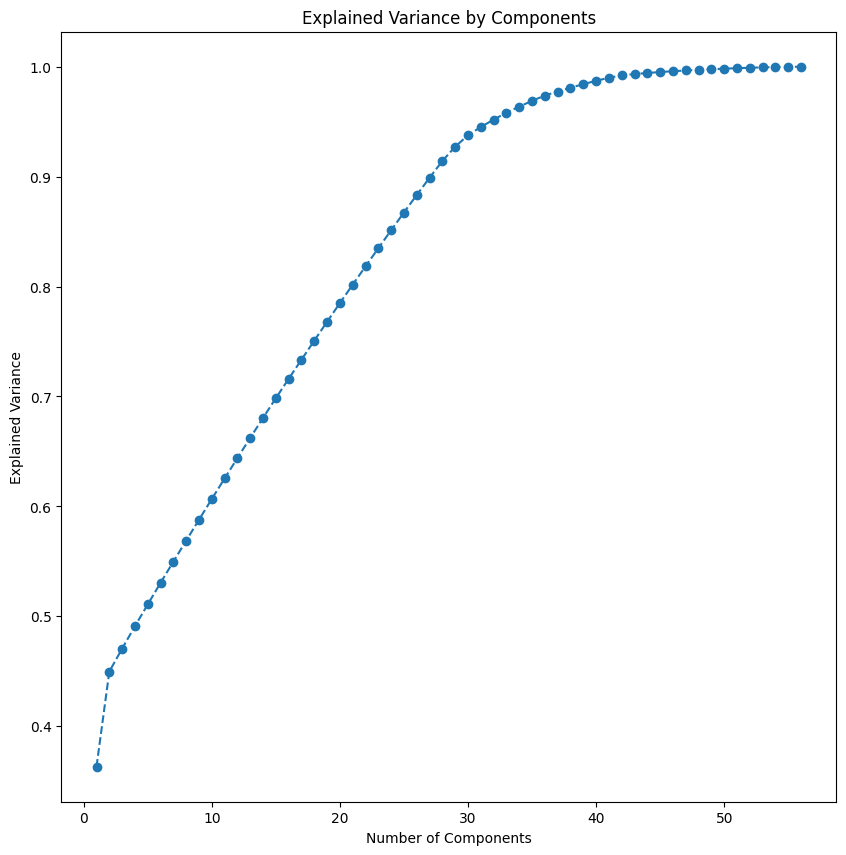

In [14]:
import matplotlib.pyplot as plt

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Visualizing the explained variance ratio
plt.figure(figsize=(10, 10))

plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='--')

plt.title('Explained Variance by Components')

plt.xlabel('Number of Components')

plt.ylabel('Explained Variance')

plt.show()

In [19]:
idx = 0

for ix, i in enumerate(cumulative_explained_variance):
    if i >= 0.95:
        idx = ix + 1
        break

print(f"Number of components to explain 95% of the variance: {idx}")

Number of components to explain 95% of the variance: 32


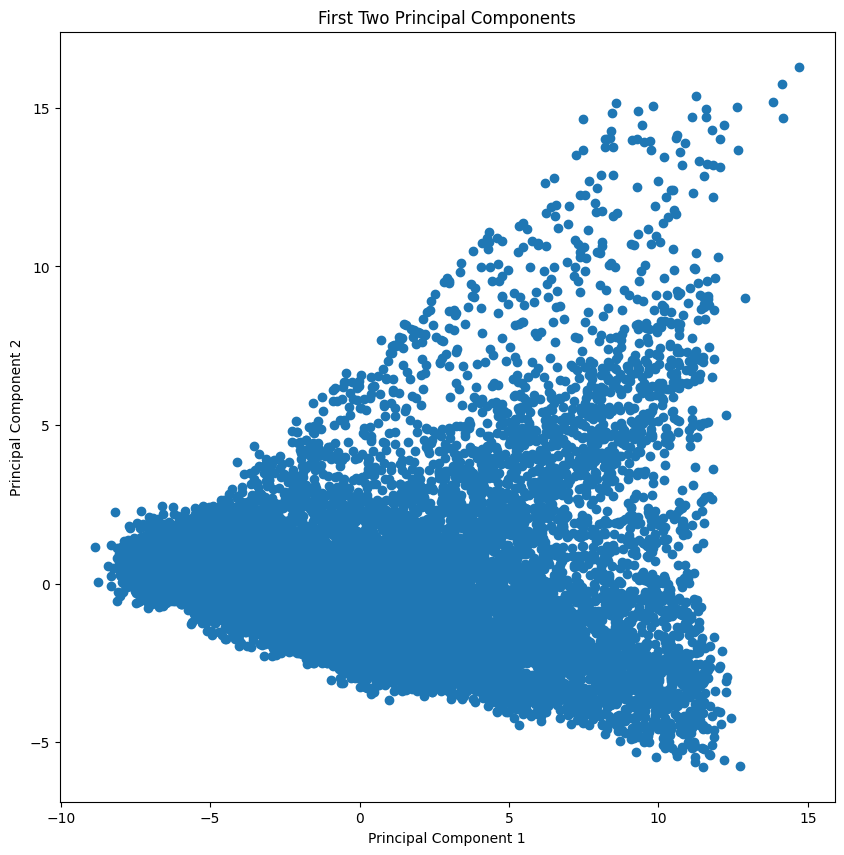

In [21]:
# Plotting the first two principal components
plt.figure(figsize=(10, 10))

plt.scatter(X_pca[:, 0], X_pca[:, 1])

plt.title('First Two Principal Components')

plt.xlabel('Principal Component 1')

plt.ylabel('Principal Component 2')

plt.show()

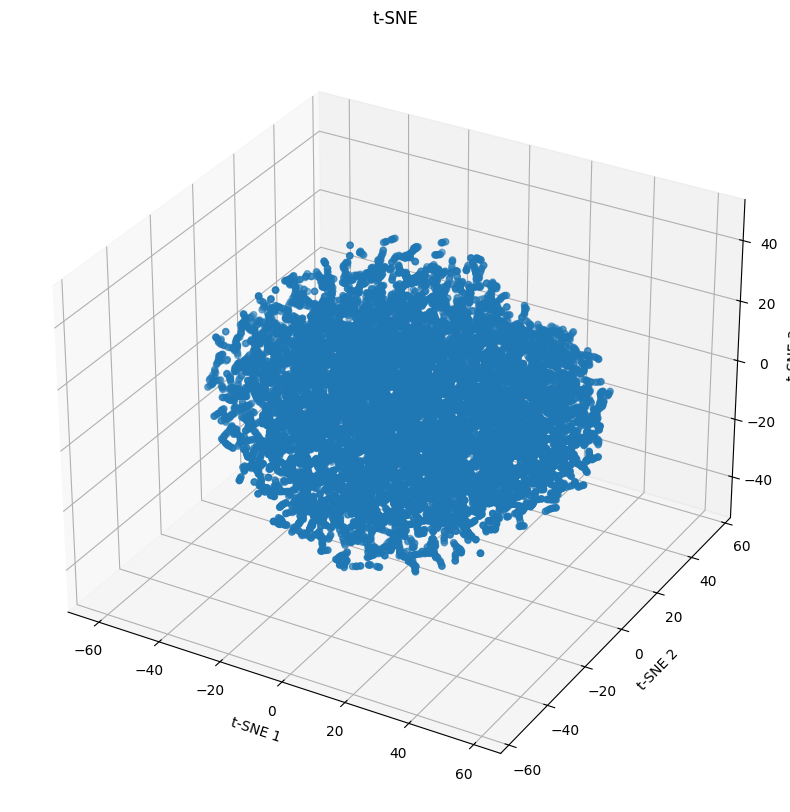

In [23]:
from sklearn.manifold import TSNE

# Defining the model
tsne = TSNE(n_components=3, random_state=42)

# Fitting the model
X_tsne = tsne.fit_transform(X_scaled)

# Plotting the tridiemensional t-SNE
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2])

ax.set_title('t-SNE')

ax.set_xlabel('t-SNE 1')

ax.set_ylabel('t-SNE 2')

ax.set_zlabel('t-SNE 3')

plt.show()
